In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Data/re_dataset.csv",encoding="latin-1")
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
data.shape

(13169, 13)

## Data Analysis

### Perbandingan jumlah tiap label

In [4]:
label_size0 = []
label_size1 = []

for i in data.columns[1:]:
    label_size0.append(data.groupby(i).size().iloc[0])
    label_size1.append(data.groupby(i).size().iloc[1])

In [5]:
dat_anls = pd.DataFrame({
    'label' : data.columns[1:],
    'negative' : label_size0,
    'positive' : label_size1
})

dat_anls = dat_anls.set_index(['label'], drop=True)

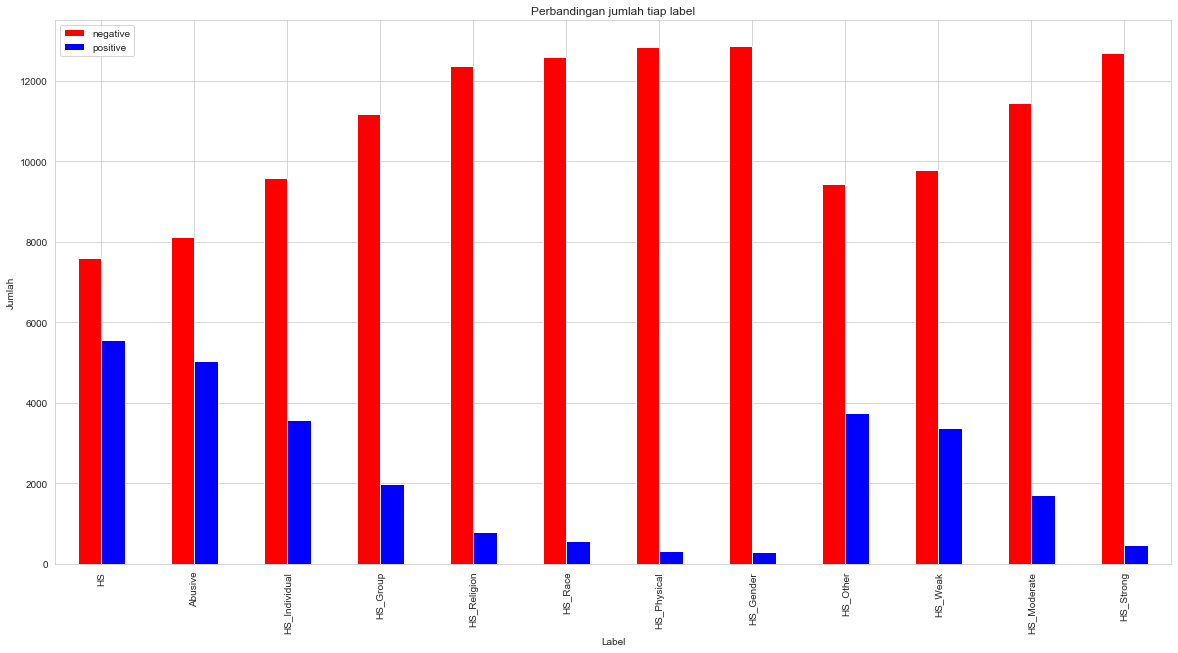

In [6]:
dat_anls.loc[:,['negative','positive']].plot.bar(color=['red','blue'], figsize=(20,10))
plt.title("Perbandingan jumlah tiap label")
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

### Multiple labels per tweet

Text(0.5, 0, '# of labels')

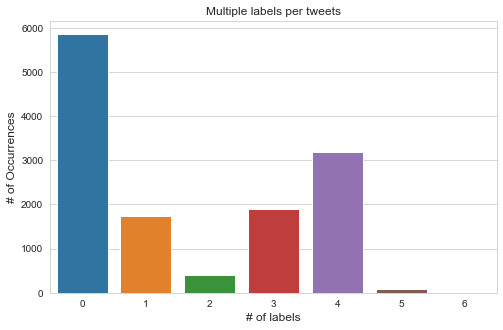

In [7]:
rowsums = data.iloc[:,2:-1].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple labels per tweets")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of labels', fontsize=12)

### Distribusi Panjang Tweet

In [8]:
news_length = pd.DataFrame()
news_length['News_length'] = data['Tweet'].str.len()

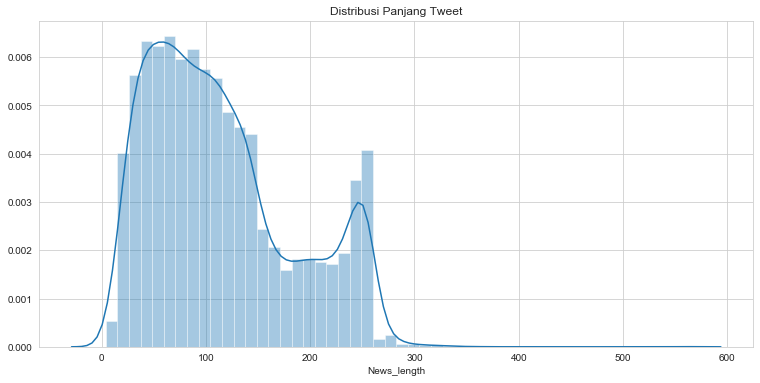

In [9]:
plt.figure(figsize=(12.8,6))
sns.distplot(news_length['News_length']).set_title('Distribusi Panjang Tweet');

### Sampel Tweet

In [10]:
data['Tweet'].iloc[0]

"- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"

## Data Preprocessing

### Text Cleaning and Preparation

1. menghilangkan simbol khusus seperti \r, \n, "

In [11]:
data['Tweet_Parsed_1'] = data['Tweet'].str.replace("\r", " ")
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\n", " ")
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("    ", " ")

In [12]:
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace('"', '')

2. mengubah menjadi lower case

In [13]:
data['Tweet_Parsed_2'] = data['Tweet_Parsed_1'].str.lower()

3. Hapus simbol dan tanda baca

In [14]:
punctuation_signs = list("?:!.,;@#$%^&*()-+=_{}[]\|/><~`1234567890")
data['Tweet_Parsed_3'] = data['Tweet_Parsed_2']

for punct_sign in punctuation_signs:
    data['Tweet_Parsed_3'] = data['Tweet_Parsed_3'].str.replace(punct_sign, ' ')

4. Normalisasi Kata

In [15]:
kamus_normal = pd.read_csv("Data/new_kamusalay.csv",encoding='latin-1',header=None,names=["non-standard word","standard word"])
kamus_normal.head()

,non-standard word,standard word
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [16]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [17]:
nonstdword

['anakjakartaasikasik',
 'pakcikdahtua',
 'pakcikmudalagi',
 't3tapjokowi',
 '3x',
 'aamiin',
 'aamiinn',
 'aamin',
 'aammiin',
 'abis',
 'abisin',
 'acau',
 'achok',
 'ad',
 'adek',
 'adl',
 'adlah',
 'adlh',
 'ado',
 'aduhh',
 'aer',
 'afdol',
 'agamaataualqur',
 'agm',
 'agma',
 'ahaha',
 'ahahaha',
 'ahehehehe',
 'ahir',
 'ahirnya',
 'ahk',
 'ahlamdulillah',
 'ahli2',
 'ahlusunnah',
 'ahmaddani',
 'aho',
 'ahoax',
 'ahoaxx',
 'ahog',
 'ahokataudjarot',
 'ahokbebanijokowi',
 'ahokbtp',
 'ahokditolakwarga',
 'ahokdjarot',
 'ahokdjarotterbukti',
 'ahokers',
 'ahokfighter',
 'ahokforpresident',
 'ahokisthebest',
 'ahokjarot',
 'ahokk',
 'ahokmasukbui',
 'ahokmeskipun',
 'ahokpositifjadi',
 'ahoksatuputaran',
 'ahoksemangat',
 'ahoktersangka',
 'ahokterzhalimi',
 'ahoktetap',
 'ahoktidaksendiri',
 'ahokUSER',
 'ahook',
 'ahox',
 'aing',
 'airmata',
 'aiskrim',
 'aj',
 'aja',
 'ajaa',
 'ajah',
 'ajalah',
 'aje',
 'ajg',
 'ajh',
 'ajib',
 'ajj',
 'ak',
 'akalakalan',
 'akalakaln',
 'akank

In [18]:
stdword

['anak jakarta asyik asyik',
 'pak cik sudah tua',
 'pak cik muda lagi',
 'tetap jokowi',
 'tiga kali',
 'amin',
 'amin',
 'amin',
 'amin',
 'habis',
 'habiskan',
 'kacau',
 'ahok',
 'ada',
 'adik',
 'adalah',
 'adalah',
 'adalah',
 'ada',
 'aduh',
 'air',
 'afdal',
 'agama alquran',
 'agama',
 'agama',
 'haha',
 'haha',
 'hehe',
 'akhir',
 'akhirnya',
 'ahok',
 'alhamdulillah',
 'para ahli',
 'ahlus sunah',
 'ahmad dhani',
 'ahok',
 'ahok',
 'ahok',
 'ahok',
 'ahok djarot',
 'ahok beban jokowi',
 'ahok basuki tjahaja purnama',
 'ahok ditolak warga',
 'ahok djarot',
 'ahok djarot terbukti',
 'ahoker',
 'ahok pejuang',
 'ahok for presiden',
 'ahok terbaik',
 'ahok djarot',
 'ahok',
 'ahok masuk bui',
 'ahok meskipun',
 'ahok positif jadi',
 'ahok satu putaran',
 'ahok semangat',
 'ahok tersangka',
 'ahok terzalimi',
 'ahok tetap',
 'ahok tidak sendiri',
 'ahok',
 'ahok',
 'ahok',
 'aku',
 'air mata',
 'es krim',
 'saja',
 'saja',
 'saja',
 'saja',
 'sajalah',
 'saja',
 'anjing',
 'saja'

In [19]:
def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

In [20]:
data['Tweet_Parsed_4'] = data['Tweet_Parsed_3']

data['Tweet_Parsed_4'] = data['Tweet_Parsed_4'].map(lambda com : normalize_text(com,stdword,nonstdword))

5. Menghilangkan imbuhan (*stemming*)

In [21]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [22]:
def stemming(text, stemmer_):
    return stemmer.stem(text)

In [23]:
text = data['Tweet_Parsed_4'].values
stemmed_text = []

for i in text:
    text_split = i.split(" ")
    stemmed_list = []
    for j in text_split:
        stemmed_list.append(stemmer.stem(j))
    stemmed = ' '.join(map(str,stemmed_list))
    stemmed_text.append(stemmed)

data['Tweet_Parsed_5'] = stemmed_text

In [24]:
data['Tweet_Parsed_5'] = data['Tweet_Parsed_4']
data['Tweet_Parsed_5'] = data['Tweet_Parsed_4'].map(lambda com : stemming(com,stemmer))

6. Remove Stopword

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words = list(stopwords.words('indonesian'))

In [27]:
stop_words[1:10]

['adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [28]:
len(stop_words)

758

In [29]:
data['Tweet_Parsed_6'] = data['Tweet_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    data['Tweet_Parsed_6'] = data['Tweet_Parsed_6'].str.replace(regex_stopword, '')

7. clean space

In [39]:
def clean_space(text):
    text_split = text.split(' ')
    text_clean = [i for i in text_split if i != '']
    text_fix = ' '.join(map(str,text_clean))
    return text_fix

In [40]:
data['Tweet_Parsed_7'] = data['Tweet_Parsed_6']

data['Tweet_Parsed_7'] = data['Tweet_Parsed_7'].map(lambda com : clean_space(com))

### Preprocessing Result

In [30]:
idx_length150 = news_length[news_length['News_length']==150].index.values[0]

In [31]:
data['Tweet'].loc[idx_length150]

"Mau tanya serius ini sm presiden jokowi======= knp yg ada cm islam nusantara,knp tdk ada kristen nusantara,budha,hindu bahkan kong huchu nusantara???'"

In [32]:
data['Tweet_Parsed_1'].loc[idx_length150]

"Mau tanya serius ini sm presiden jokowi======= knp yg ada cm islam nusantara,knp tdk ada kristen nusantara,budha,hindu bahkan kong huchu nusantara???'"

In [33]:
data['Tweet_Parsed_2'].loc[idx_length150]

"mau tanya serius ini sm presiden jokowi======= knp yg ada cm islam nusantara,knp tdk ada kristen nusantara,budha,hindu bahkan kong huchu nusantara???'"

In [34]:
data['Tweet_Parsed_3'].loc[idx_length150]

"mau tanya serius ini sm presiden jokowi        knp yg ada cm islam nusantara knp tdk ada kristen nusantara budha hindu bahkan kong huchu nusantara   '"

In [35]:
data['Tweet_Parsed_4'].loc[idx_length150]

"mau tanya serius ini sama presiden jokowi        kenapa yang ada cuma islam nusantara kenapa tidak ada kristen nusantara buddha hindu bahkan kong hucu nusantara   '"

In [36]:
data['Tweet_Parsed_5'].loc[idx_length150]

'mau tanya serius ini sama presiden jokowi kenapa yang ada cuma islam nusantara kenapa tidak ada kristen nusantara buddha hindu bahkan kong hucu nusantara'

In [37]:
data['Tweet_Parsed_6'].loc[idx_length150]

'  serius   presiden jokowi     islam nusantara    kristen nusantara buddha hindu  kong hucu nusantara'

In [41]:
data['Tweet_Parsed_7'].loc[idx_length150]

'serius presiden jokowi islam nusantara kristen nusantara buddha hindu kong hucu nusantara'

## Data Fix

In [42]:
data.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong', 'Tweet_Parsed_1', 'Tweet_Parsed_2',
       'Tweet_Parsed_3', 'Tweet_Parsed_4', 'Tweet_Parsed_5', 'Tweet_Parsed_6',
       'Tweet_Parsed_7'],
      dtype='object')

In [43]:
data_fix = data.drop(['Tweet_Parsed_1', 'Tweet_Parsed_2','Tweet_Parsed_3','Tweet_Parsed_4','Tweet_Parsed_5','Tweet_Parsed_6'],axis=1)

data_fix = data_fix.rename(columns={'Tweet_Parsed_7': 'Tweet_Parsed'})

In [44]:
data_fix.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati gue lantas remeh per...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,rt telat tau edan sarap gue gaul cigax jifla c...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang pikir percaya tuhan jatuh kali kali kad...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,ku tau mata sipit lihat
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dongok dungu hahahah
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,ya bani taplak kawan kawan xf x f x x xf x f x...
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,deklarasi pilih kepala daerah aman anti hoaks ...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,gue selesai re watch aldnoah zero kampret kara...
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,admin belanja port nak makan ais kepal milo ai...
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,enak ngewe


## Save Preprocessed Data

In [46]:
data_fix.to_csv('Data/Preprocessed_Data.csv', index = False)